In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic"

df = pd.read_csv("data.csv", encoding="cp949", thousands=",")

In [5]:
pos = input('자신이 거주하고 있는 읍,면,동의 이름을 입력하시오: ')

df100 = df[df['행정구역'].str.contains(pos)]
print(df100[['행정구역','총인구수']].head())
print('-'*50)

all_df = df[df.columns[0:104]]
pivot = np.array(all_df[all_df["행정구역"].str.contains(pos)])[0]
res_df = pd.DataFrame()
mn = pivot[1]

for row in np.array(all_df) :
    s = 0
    for i in range(3, len(row)) :
        tmp = np.abs(pivot[i]-row[i])
        s = s + tmp 
    if s < mn and (pos not in row[0]):
        result = []
        for i in range(3, len(row)) :
            result.append(row[i])
        mn = s          
        result_name = row[0]
        res_df = pd.concat([res_df, all_df[all_df["행정구역"]==row[0]]])
print(res_df[["행정구역", "총인구수"]])

                            행정구역   총인구수
259  서울특별시 강서구 등촌제2동(1150053000)  19869
--------------------------------------------------
                            행정구역   총인구수
2    서울특별시 종로구 청운효자동(1111051500)  11766
6      서울특별시 종로구 평창동(1111056000)  17915
49     서울특별시 용산구 한남동(1117068500)  20191
74   서울특별시 광진구 중곡제2동(1121575000)  21105
110  서울특별시 중랑구 중화제1동(1126060000)  19324
208   서울특별시 서대문구 충현동(1141056500)  20147
422   서울특별시 송파구 문정1동(1171064100)  19898


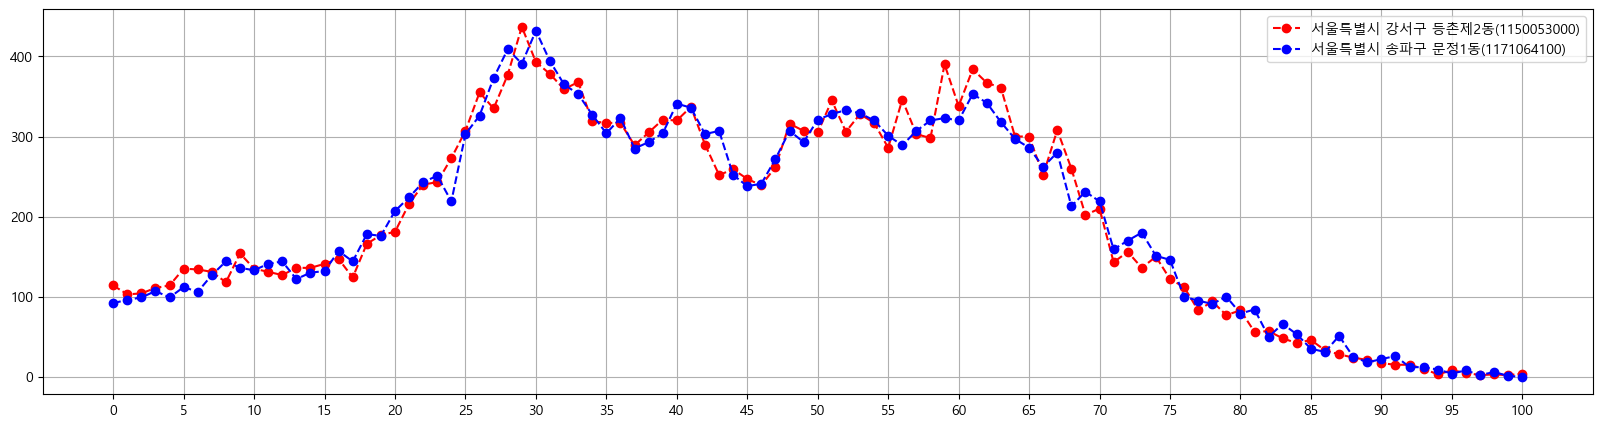

In [6]:
away_df = res_df.iloc[:,3:]
away=away_df.tail(1).to_numpy()[0]

x=np.arange(0,101)
plt.figure(figsize=(20,5))

plt.plot(x,away,'ro--')
plt.plot(x,pivot[3:],'bo--')
plt.xticks(np.arange(0,101,5))

plt.grid()
plt.legend([pivot[0],res_df.iloc[-1,0]])
plt.show()